In [197]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


In [112]:
df = pd.read_csv('tmdb_5000_credits.csv')
pd.set_option('display.max_columns',999)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [4]:
df.sample(5)

,movie_id,title,cast,crew
2770,13074,Resurrecting the Champ,"[{""cast_id"": 8, ""character"": ""Champ"", ""credit_...","[{""credit_id"": ""55f982e09251410818002802"", ""de..."
2099,1584,School of Rock,"[{""cast_id"": 1, ""character"": ""Dewey Finn"", ""cr...","[{""credit_id"": ""52fe4301c3a36847f8033479"", ""de..."
417,16281,Creepshow,"[{""cast_id"": 9, ""character"": ""Henry Northrup (...","[{""credit_id"": ""52fe46c09251416c750824fb"", ""de..."
2509,9035,Slither,"[{""cast_id"": 1, ""character"": ""Bill Pardy"", ""cr...","[{""credit_id"": ""52fe44d4c3a36847f80ac8a3"", ""de..."
4484,26837,B-Girl,"[{""cast_id"": 1, ""character"": ""Angel (as Jules ...","[{""credit_id"": ""52fe451cc3a368484e049161"", ""de..."


In [5]:
df['cast']=df['cast'].apply(lambda x:json.loads(x))

In [6]:
df['crew']=df['crew'].apply(lambda x:json.loads(x))

In [7]:
df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'name': 'Sam Worthington', '...","[{'credit_id': '52fe48009251416c750aca23', 'id..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'name': 'Johnny Depp', 'id': 8...","[{'credit_id': '52fe4232c3a36847f800b579', 'id..."
2,206647,Spectre,"[{'cast_id': 1, 'name': 'Daniel Craig', 'id': ...","[{'credit_id': '54805967c3a36829b5002c41', 'id..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'name': 'Christian Bale', 'id'...","[{'credit_id': '52fe4781c3a36847f81398c3', 'id..."
4,49529,John Carter,"[{'cast_id': 5, 'name': 'Taylor Kitsch', 'id':...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'id..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [9]:
df.loc[8,'cast'][5]

{'cast_id': 27,
 'character': 'Horace Slughorn',
 'credit_id': '52fe4273c3a36847f801fafd',
 'gender': 2,
 'id': 388,
 'name': 'Jim Broadbent',
 'order': 5}

In [10]:
df['cast']=df['cast'].apply(lambda x:np.nan if len(x)==0 else x )

In [11]:
df['crew']=df['crew'].apply(lambda x:np.nan if len(x)==0 else x )

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4760 non-null object
crew        4775 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [13]:
df.sample(6)

,movie_id,title,cast,crew
969,9691,Assassins,"[{'cast_id': 1, 'name': 'Sylvester Stallone', ...","[{'credit_id': '54942ba79251416e2400160f', 'id..."
2297,203833,The Book Thief,"[{'cast_id': 1, 'name': 'Geoffrey Rush', 'id':...","[{'credit_id': '53185c8f92514177bf000e45', 'id..."
1346,2155,Reindeer Games,"[{'cast_id': 17, 'name': 'Ben Affleck', 'id': ...","[{'credit_id': '52fe433bc3a36847f804473f', 'id..."
3774,48572,Red State,"[{'cast_id': 7, 'name': 'Michael Parks', 'id':...","[{'credit_id': '52fe476cc3a36847f8134c25', 'id..."
4431,292539,Food Chains,NaN,"[{'credit_id': '5470c3b1c3a368085e000abd', 'id..."
388,161,Ocean's Eleven,"[{'cast_id': 11, 'name': 'George Clooney', 'id...","[{'credit_id': '52fe4220c3a36847f800615d', 'id..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4760 non-null object
crew        4775 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [15]:
df.dropna(subset=['cast'], axis=0, inplace=True)

In [16]:
df.dropna(subset=['crew'], axis=0, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4753 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4753 non-null int64
title       4753 non-null object
cast        4753 non-null object
crew        4753 non-null object
dtypes: int64(1), object(3)
memory usage: 185.7+ KB


In [18]:
df['crew'].isnull().sum()

0

In [19]:
df.tail(10)

,movie_id,title,cast,crew
4792,36095,Cure,"[{'cast_id': 3, 'name': 'Koji Yakusho', 'id': ...","[{'credit_id': '52fe45cc9251416c9103eb7b', 'id..."
4793,182291,On The Downlow,"[{'cast_id': 1, 'name': 'Tony Sancho', 'id': 1...","[{'credit_id': '548c416392514122ef00197d', 'id..."
4794,286939,Sanctuary: Quite a Conundrum,"[{'cast_id': 3, 'name': 'Sasha Ramos', 'id': 1...","[{'credit_id': '545f8107c3a3686cbb0041fd', 'id..."
4795,124606,Bang,"[{'cast_id': 2, 'name': 'Darling Narita', 'id'...","[{'credit_id': '52fe4ab0c3a368484e161add', 'id..."
4796,14337,Primer,"[{'cast_id': 1, 'name': 'Shane Carruth', 'id':...","[{'credit_id': '52fe45e79251416c75066791', 'id..."
4798,9367,El Mariachi,"[{'cast_id': 1, 'name': 'Carlos Gallardo', 'id...","[{'credit_id': '52fe44eec3a36847f80b280b', 'id..."
4799,72766,Newlyweds,"[{'cast_id': 1, 'name': 'Edward Burns', 'id': ...","[{'credit_id': '52fe487dc3a368484e0fb013', 'id..."
4800,231617,"Signed, Sealed, Delivered","[{'cast_id': 8, 'name': 'Eric Mabius', 'id': 1...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'id..."
4801,126186,Shanghai Calling,"[{'cast_id': 3, 'name': 'Daniel Henney', 'id':...","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'id..."
4802,25975,My Date with Drew,"[{'cast_id': 3, 'name': 'Drew Barrymore', 'id'...","[{'credit_id': '58ce021b9251415a390165d9', 'id..."


In [20]:
def app(x):
    df_cast= pd.DataFrame()
    actor1,actor2,actor3,actor4,actor5='','','','',''
    for i in x:
        if i['order']==0:
            actor1=i['name']
            #df_cast.set_value('actor1',i['name'])
        elif i['order']==1:
            actor2=i['name']
            #df_cast.set_value('actor2',i['name'])
        elif i['order']==2:
            actor3=i['name']
            #df_cast.set_value('actor3',i['name'])
        elif i['order']==3:
            actor4=i['name']
            #df_cast.set_value('actor4',i['name'])
        elif i['order']==4:
            actor5=i['name']
            #df_cast.set_value('actor5',i['name'])
            



# Cleaning Second File :movie

In [21]:
movie_df= pd.read_csv('tmdb_5000_movies.csv')

In [22]:
def load_movies(movie_df):
    movie_df['release_date'] = pd.to_datetime(movie_df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        movie_df[column] = movie_df[column].apply(json.loads)
    return movie_df


In [23]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [24]:
load_movies(movie_df)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'name': 'Action', 'id': 28}, {'name': 'Adven...",http://www.avatarmovie.com/,19995,"[{'name': 'culture clash', 'id': 1463}, {'name...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'name': 'United States of America', 'iso_316...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'name': 'Adventure', 'id': 12}, {'name': 'Fa...",http://disney.go.com/disneypictures/pirates/,285,"[{'name': 'ocean', 'id': 270}, {'name': 'drug ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'name': 'United States of America', 'iso_316...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'name': 'Action', 'id': 28}, {'name': 'Adven...",http://www.sonypictures.com/movies/spectre/,206647,"[{'name': 'spy', 'id': 470}, {'name': 'based o...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'name': 'United Kingdom', 'iso_3166_1': 'GB'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'name': 'Action', 'id': 28}, {'name': 'Crime...",http://www.thedarkknightrises.com/,49026,"[{'name': 'dc comics', 'id': 849}, {'name': 'c...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'name': 'United States of America', 'iso_316...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'name': 'Action', 'id': 28}, {'name': 'Adven...",http://movies.disney.com/john-carter,49529,"[{'name': 'based on novel', 'id': 818}, {'name...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'name': 'United States of America', 'iso_316...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{'name': 'Fantasy', 'id': 14}, {'name': 'Acti...",http://www.sonypictures.com/movies/spider-man3/,559,"[{'name': 'dual identity', 'id': 851}, {'name'...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'name': 'United States of America', 'iso_316...",2007-05-01,890871626,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{'name': 'Animation', 'id': 16}, {'name': 'Fa...",http://disney.go.com/disneypictures/tangled/,38757,"[{'name': 'hostage', 'id': 1562}, {'name': 'ma...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'name': 'United States of America', 'iso_316...",2010-11-24,591794936,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{'name': 'Action', 'id': 28}, {'name': 'Adven...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{'name': 'marvel comic', 'id': 8828}, {'name'...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...","[{'name': 'United States of America', 'iso_316...",2015-04-22,1405403694,141

In [25]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [26]:
def safe_access(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan

In [27]:
def get_director(x):
    directors=[]
    for i in x:
        if i['job'] == 'Director':
            directors.append(i['name'])
    return safe_access(directors, [0])
        

In [28]:
def get_keywords(keywords):
    return ';'.join([x['name'] for x in keywords])

In [29]:
def data_join(movie_df, df):
    movies = movie_df.copy()
    movies['year'] = pd.to_datetime(movies['release_date']).apply(lambda x: x.year)
    movies['country'] = movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    movies['language'] = movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    movies['director'] = df['crew'].apply(get_director)
    movies['actor_1'] = df['cast'].apply(lambda x: safe_access(x, [0, 'name']))
    movies['actor_2'] = df['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    movies['actor_3'] = df['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    movies['companies_1'] = movies['production_companies'].apply(lambda x: safe_access(x, [0, 'name']))
    movies['companies_2'] = movies['production_companies'].apply(lambda x: safe_access(x, [1, 'name']))
    movies['companies_3'] = movies['production_companies'].apply(lambda x: safe_access(x, [2, 'name']))
    movies['genres'] = movies['genres'].apply(get_keywords)
    movies['plot_keywords'] = movie_df['keywords'].apply(get_keywords)
    return movies


In [30]:
movies=data_join(movie_df, df)

In [31]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 31 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [32]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,country,language,director,actor_1,actor_2,actor_3,companies_1,companies_2,companies_3,plot_keywords
0,237000000,Action;Adventure;Fantasy;Science Fiction,http://www.avatarmovie.com/,19995,"[{'name': 'culture clash', 'id': 1463}, {'name...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,United States of America,English,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,culture clash;future;space war;space colony;so...
1,300000000,Adventure;Fantasy;Action,http://disney.go.com/disneypictures/pirates/,285,"[{'name': 'ocean', 'id': 270}, {'name': 'drug ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,United States of America,English,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions,ocean;drug abuse;exotic island;east india trad...
2,245000000,Action;Adventure;Crime,http://www.sonypictures.com/movies/spectre/,206647,"[{'name': 'spy', 'id': 470}, {'name': 'based o...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,United Kingdom,Français,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24,spy;based on novel;secret agent;sequel;mi6;bri...
3,250000000,Action;Crime;Drama;Thriller,http://www.thedarkknightrises.com/,49026,"[{'name': 'dc comics', 'id': 849}, {'name': 'c...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,United States of America,English,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment,dc comics;crime fighter;terrorist;secret ident...
4,260000000,Action;Adventure;Science Fiction,http://movies.disney.com/john-carter,49529,"[{'name': 'based on novel', 'id': 818}, {'name...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,United States of America,English,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton,Walt Disney Pictures,NaN,NaN,based on novel;mars;medallion;space travel;pri...


### Missing data

In [157]:
def test(x):
    total = movies.isnull().sum().sort_values(ascending=False)
    percent = (movies.isnull().sum()/movies.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

### dropping feature generated after release

In [34]:
movies.drop(['popularity','revenue','vote_count'],axis=1, inplace=True)

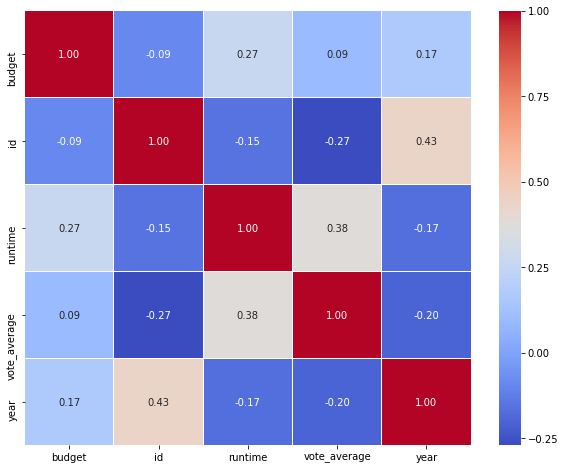

In [35]:
# Correlation matrix between numerical values
plt.figure(figsize = (10,8))
g = sns.heatmap(movies[list(movies)].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x720 with 0 Axes>

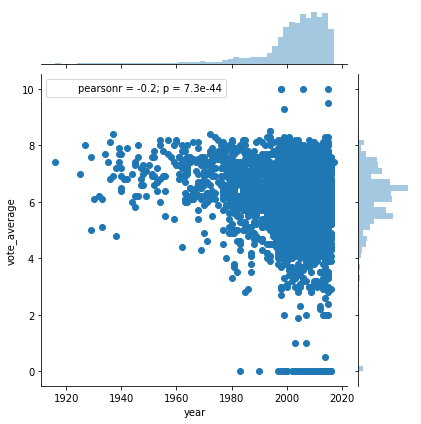

In [36]:
plt.figure(figsize = (10,10))
sns.jointplot(x="year", y=movies['vote_average'], data=movies);

### Dropping missing values

In [37]:
movies['vote_average']=movies['vote_average'].replace(0,np.nan)

In [38]:
movies.dropna(subset=['vote_average'],axis=0,inplace=True)

In [39]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4740 entries, 0 to 4802
Data columns (total 28 columns):
budget                  4740 non-null int64
genres                  4740 non-null object
homepage                1699 non-null object
id                      4740 non-null int64
keywords                4740 non-null object
original_language       4740 non-null object
original_title          4740 non-null object
overview                4738 non-null object
production_companies    4740 non-null object
production_countries    4740 non-null object
release_date            4740 non-null object
runtime                 4739 non-null float64
spoken_languages        4740 non-null object
status                  4740 non-null object
tagline                 3944 non-null object
title                   4740 non-null object
vote_average            4740 non-null float64
year                    4740 non-null float64
country                 4594 non-null object
language                4676 non-null

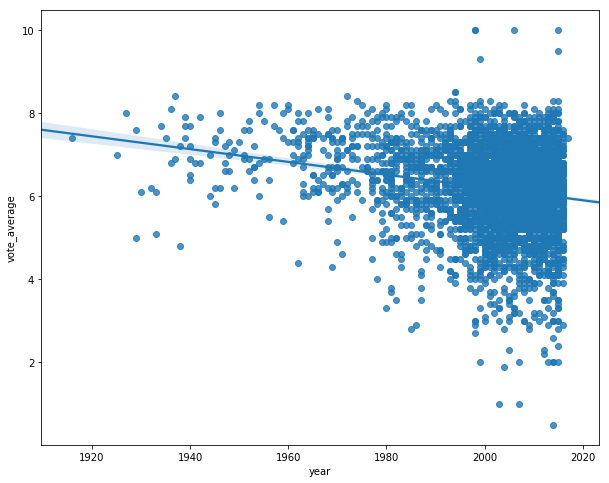

In [40]:
plt.figure(figsize = (10,8))
sns.regplot(x="year", y="vote_average", data=movies)

### Correlation between movie duration and vote average

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x720 with 0 Axes>

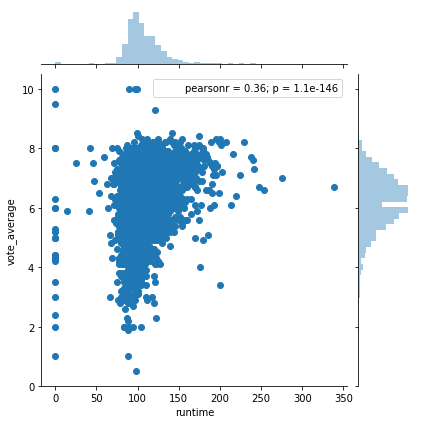

In [41]:
plt.figure(figsize = (10,10))
sns.jointplot(x="runtime", y="vote_average", data=movies)

### Removing data with no runtime value ( 0 )

In [42]:
movies=movies[movies['runtime']!=0]

In [43]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4717 entries, 0 to 4802
Data columns (total 28 columns):
budget                  4717 non-null int64
genres                  4717 non-null object
homepage                1696 non-null object
id                      4717 non-null int64
keywords                4717 non-null object
original_language       4717 non-null object
original_title          4717 non-null object
overview                4715 non-null object
production_companies    4717 non-null object
production_countries    4717 non-null object
release_date            4717 non-null object
runtime                 4716 non-null float64
spoken_languages        4717 non-null object
status                  4717 non-null object
tagline                 3939 non-null object
title                   4717 non-null object
vote_average            4717 non-null float64
year                    4717 non-null float64
country                 4587 non-null object
language                4668 non-null

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x720 with 0 Axes>

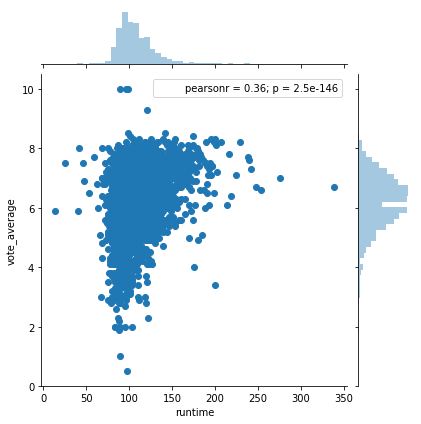

In [44]:
plt.figure(figsize = (10,10))
sns.jointplot(x="runtime", y="vote_average", data=movies)

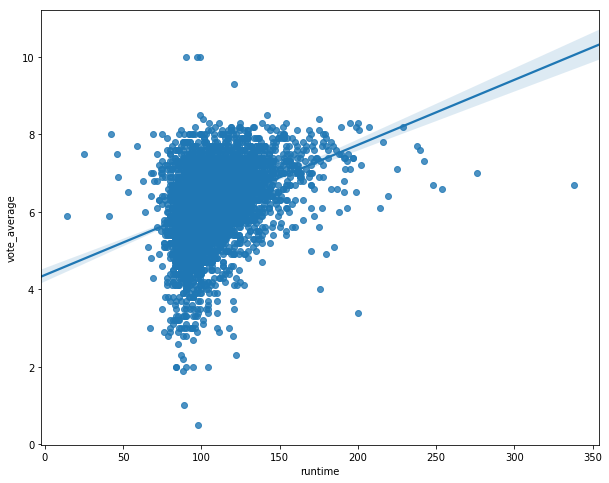

In [45]:
plt.figure(figsize = (10,8))
sns.regplot(x="runtime", y="vote_average", data=movies)

In [46]:
total = movies.isnull().sum().sort_values(ascending=False)
percent = (movies.isnull().sum()/movies.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
homepage,3021,0.640449
companies_3,2394,0.507526
companies_2,1339,0.283867
tagline,778,0.164935
companies_1,293,0.062116
country,130,0.027560
language,49,0.010388
actor_3,40,0.008480
actor_2,32,0.006784
director,26,0.005512


### Feature used for classification: vote_average

In [47]:
movies['vote_average'].min()

0.5

In [48]:
movies['vote_average'].max()

10.0

In [49]:
movies['vote_average'].mean()

6.178418486326055

### Rank=1 -> good movie ( vote_average > mean) , 0 average ( 2< vote_average<mean_vote_average) , -1 bad <2

In [50]:
movies['Rank'] = movies['vote_average'].map(lambda x :1  if x >= movies['vote_average'].mean() else 0)

In [51]:
movies[['vote_average','Rank']][movies['Rank']==1]

,vote_average,Rank
0,7.2,1
1,6.9,1
2,6.3,1
3,7.6,1
6,7.4,1
7,7.3,1
8,7.4,1
12,7.0,1
14,6.5,1
15,6.3,1


In [52]:
movies[['year','title','vote_average','Rank']].head()

,year,title,vote_average,Rank
0,2009.0,Avatar,7.2,1
1,2007.0,Pirates of the Caribbean: At World's End,6.9,1
2,2015.0,Spectre,6.3,1
3,2012.0,The Dark Knight Rises,7.6,1
4,2012.0,John Carter,6.1,0


In [53]:
movies[['year','title','vote_average','Rank']][movies['Rank']==1]

,year,title,vote_average,Rank
0,2009.0,Avatar,7.2,1
1,2007.0,Pirates of the Caribbean: At World's End,6.9,1
2,2015.0,Spectre,6.3,1
3,2012.0,The Dark Knight Rises,7.6,1
6,2010.0,Tangled,7.4,1
7,2015.0,Avengers: Age of Ultron,7.3,1
8,2009.0,Harry Potter and the Half-Blood Prince,7.4,1
12,2006.0,Pirates of the Caribbean: Dead Man's Chest,7.0,1
14,2013.0,Man of Steel,6.5,1
15,2008.0,The Chronicles of Narnia: Prince Caspian,6.3,1


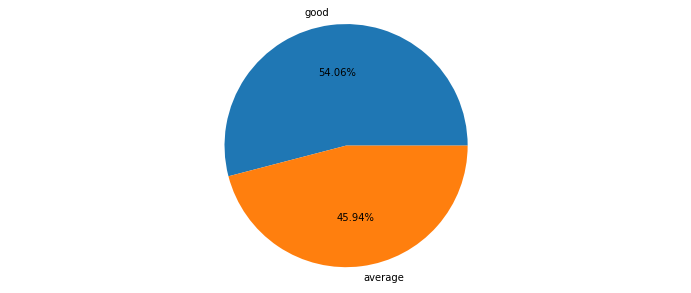

In [54]:
fig, ax = plt.subplots(figsize=(12,5))
plt.pie(movies['Rank'].value_counts(), labels=['good','average'], autopct='%1.2f%%')
plt.axis('equal')
plt.show()

### Budget level (VeryHigh,High,medium,low)

In [55]:
movies['budget'].min()

0

In [56]:
movies=movies[movies['budget']>= 100000]

In [57]:
movies['budget'].max()

380000000

In [58]:
movies['budget'].mean()

37699630.20243243

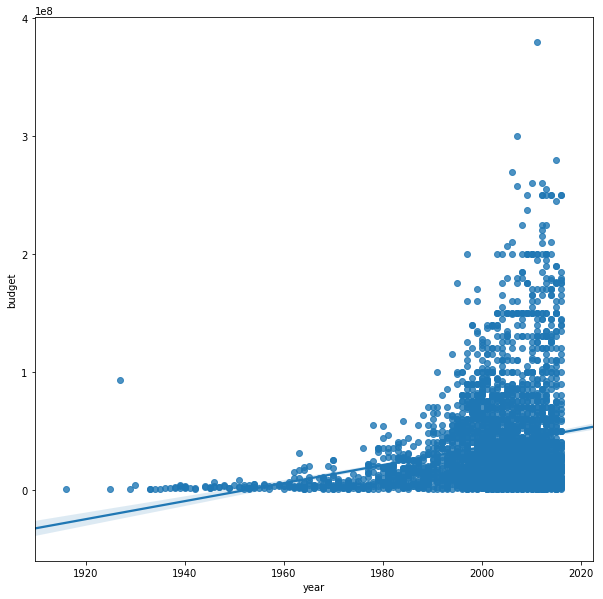

In [59]:
plt.figure(figsize = (10,10))
sns.regplot(x="year", y="budget", data=movies)

In [60]:
def budget_level(x):
    if x >= 100000000:
        return 3
    elif (x < 100000000 and x >= movies['budget'].mean()):
        return 2
    elif (x > 1000000 and x < movies['budget'].mean()):
        return 1
    else:
        return 0

In [61]:
movies['Budget_level'] = movies['budget'].map(budget_level)

In [62]:
movies[['title','budget','Budget_level','Rank']].sample(20)

,title,budget,Budget_level,Rank
166,G.I. Joe: Retaliation,130000000,3,0
4434,"4 Months, 3 Weeks and 2 Days",852510,0,1
403,Last Action Hero,85000000,2,0
324,The Road to El Dorado,95000000,2,1
2097,Are We There Yet?,32000000,1,0
544,Flight of the Phoenix,45000000,2,0
829,Bowfinger,55000000,2,0
931,Race to Witch Mountain,50000000,2,0
833,Shanghai Noon,55000000,2,1
4337,Taxi Driver,1300000,1,1


In [63]:
movies[movies['Budget_level']==3][['title','budget','Budget_level','Rank']]

,title,budget,Budget_level,Rank
0,Avatar,237000000,3,1
1,Pirates of the Caribbean: At World's End,300000000,3,1
2,Spectre,245000000,3,1
3,The Dark Knight Rises,250000000,3,1
4,John Carter,260000000,3,0
5,Spider-Man 3,258000000,3,0
6,Tangled,260000000,3,1
7,Avengers: Age of Ultron,280000000,3,1
8,Harry Potter and the Half-Blood Prince,250000000,3,1
9,Batman v Superman: Dawn of Justice,250000000,3,0


### Runtime

In [64]:
movies.dropna(subset=['runtime'],axis=0,inplace=True)

In [65]:
movies['runtime'].mean()

109.66639632333063

In [66]:
movies['runtime'].min()

41.0

In [67]:
movies['runtime'].max()

338.0

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


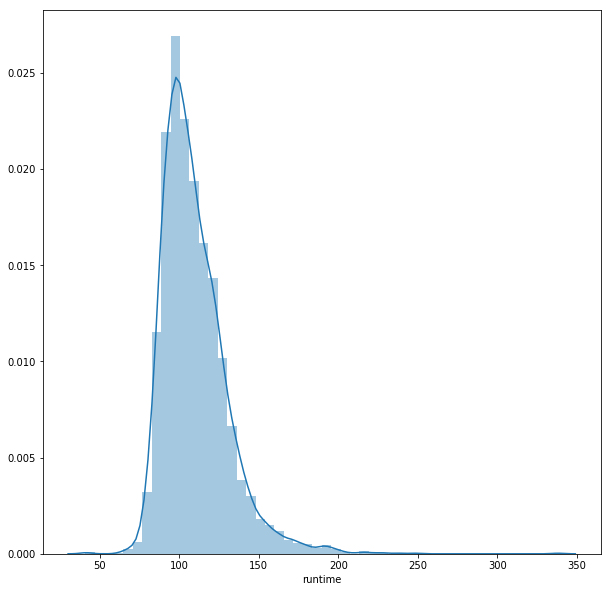

In [68]:
plt.figure(figsize = (10,10))
sns.distplot(movies['runtime'])

In [69]:
def duration(x):
    if x >= 150:
        return 2
    elif (x < 150 and x >= movies['runtime'].mean()):
        return 1
    else:
        return 0

In [70]:
movies['duration']=movies['runtime'].apply(duration)

In [71]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3699 entries, 0 to 4798
Data columns (total 31 columns):
budget                  3699 non-null int64
genres                  3699 non-null object
homepage                1460 non-null object
id                      3699 non-null int64
keywords                3699 non-null object
original_language       3699 non-null object
original_title          3699 non-null object
overview                3698 non-null object
production_companies    3699 non-null object
production_countries    3699 non-null object
release_date            3699 non-null object
runtime                 3699 non-null float64
spoken_languages        3699 non-null object
status                  3699 non-null object
tagline                 3325 non-null object
title                   3699 non-null object
vote_average            3699 non-null float64
year                    3699 non-null float64
country                 3668 non-null object
language                3684 non-null

In [72]:
movies.sort_values(by='Budget_level',ascending=False)[['title','budget','Budget_level','Rank','runtime','duration']]

,title,budget,Budget_level,Rank,runtime,duration
0,Avatar,237000000,3,1,162.0,2
205,Sherlock Holmes: A Game of Shadows,125000000,3,1,129.0,1
224,RoboCop,120000000,3,0,102.0,0
223,The Chronicles of Riddick,105000000,3,1,119.0,1
222,Elysium,115000000,3,1,109.0,0
221,Stuart Little 2,120000000,3,0,78.0,0
220,Prometheus,130000000,3,1,124.0,1
219,Charlie's Angels: Full Throttle,120000000,3,0,106.0,0
218,Jason Bourne,120000000,3,0,123.0,1
217,Ghost Rider,110000000,3,0,114.0,1


In [73]:
movies[['title','genres','plot_keywords','director','actor_1','actor_2','actor_3','companies_1','companies_2','companies_3']]

,title,genres,plot_keywords,director,actor_1,actor_2,actor_3,companies_1,companies_2,companies_3
0,Avatar,Action;Adventure;Fantasy;Science Fiction,culture clash;future;space war;space colony;so...,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment
1,Pirates of the Caribbean: At World's End,Adventure;Fantasy;Action,ocean;drug abuse;exotic island;east india trad...,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions
2,Spectre,Action;Adventure;Crime,spy;based on novel;secret agent;sequel;mi6;bri...,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24
3,The Dark Knight Rises,Action;Crime;Drama;Thriller,dc comics;crime fighter;terrorist;secret ident...,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment
4,John Carter,Action;Adventure;Science Fiction,based on novel;mars;medallion;space travel;pri...,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton,Walt Disney Pictures,NaN,NaN
5,Spider-Man 3,Fantasy;Action;Adventure,dual identity;amnesia;sandstorm;love of one's ...,Sam Raimi,Tobey Maguire,Kirsten Dunst,James Franco,Columbia Pictures,Laura Ziskin Productions,Marvel Enterprises
6,Tangled,Animation;Family,hostage;magic;horse;fairy tale;musical;princes...,Byron Howard,Zachary Levi,Mandy Moore,Donna Murphy,Walt Disney Pictures,Walt Disney Animation Studios,NaN
7,Avengers: Age of Ultron,Action;Adventure;Science Fiction,marvel comic;sequel;superhero;based on comic b...,Joss Whedon,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,Marvel Studios,Prime Focus,Revolution Sun Studios
8,Harry Potter and the Half-Blood Prince,Adventure;Fantasy;Family,witch;magic;broom;school of witchcraft;wizardr...,David Yates,Daniel Radcliffe,Rupert Grint,Emma Watson,Warner Bros.,Heyday Films,NaN
9,Batman v Superman: Dawn of Justice,Action;Adventure;Fantasy,dc comics;vigilante;superhero;based on comic b...,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,DC Comics,Atlas Entertainment,Warner Bros.


In [74]:
movies['year']=movies['year'].astype(int)

In [75]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3699 entries, 0 to 4798
Data columns (total 31 columns):
budget                  3699 non-null int64
genres                  3699 non-null object
homepage                1460 non-null object
id                      3699 non-null int64
keywords                3699 non-null object
original_language       3699 non-null object
original_title          3699 non-null object
overview                3698 non-null object
production_companies    3699 non-null object
production_countries    3699 non-null object
release_date            3699 non-null object
runtime                 3699 non-null float64
spoken_languages        3699 non-null object
status                  3699 non-null object
tagline                 3325 non-null object
title                   3699 non-null object
vote_average            3699 non-null float64
year                    3699 non-null int64
country                 3668 non-null object
language                3684 non-null o

In [64]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3700 entries, 0 to 4798
Data columns (total 29 columns):
budget                  3700 non-null int64
genres                  3700 non-null object
homepage                1460 non-null object
id                      3700 non-null int64
keywords                3700 non-null object
original_language       3700 non-null object
original_title          3700 non-null object
overview                3698 non-null object
production_companies    3700 non-null object
production_countries    3700 non-null object
release_date            3700 non-null object
runtime                 3699 non-null float64
spoken_languages        3700 non-null object
status                  3700 non-null object
tagline                 3325 non-null object
title                   3700 non-null object
vote_average            3700 non-null float64
year                    3700 non-null float64
country                 3669 non-null object
language                3685 non-null

### Genres

In [78]:
movies['genres'].nunique()

1010

In [83]:
def genre(df):
    genres=[]
    for i in df['genres']:
        s=i.split(';')
        for j in s:
            if j not in genres and j!='':
                genres.append(j)
    return genres
        

In [85]:
genres=genre(movies)

In [86]:
len(genres)

20

In [87]:
for col in genres:
    movies[col]=movies['genres'].map(lambda x:1 if col in x.split(';') else 0)

In [90]:
movies[genres]

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
movies['plot_keywords'].head()

0    culture clash;future;space war;space colony;so...
1    ocean;drug abuse;exotic island;east india trad...
2    spy;based on novel;secret agent;sequel;mi6;bri...
3    dc comics;crime fighter;terrorist;secret ident...
4    based on novel;mars;medallion;space travel;pri...
Name: plot_keywords, dtype: object

### Dropping certain columns

In [165]:
movies_data=movies.copy()

In [166]:
movies_data.drop(['homepage','id','spoken_languages','overview','original_language','original_title','release_date','runtime','status','tagline','plot_keywords','production_countries','production_companies'],axis=1,inplace=True)

In [167]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3699 entries, 0 to 4798
Data columns (total 38 columns):
budget             3699 non-null int64
genres             3699 non-null object
keywords           3699 non-null object
title              3699 non-null object
vote_average       3699 non-null float64
year               3699 non-null int64
country            3668 non-null object
language           3684 non-null object
director           3691 non-null object
actor_1            3692 non-null object
actor_2            3689 non-null object
actor_3            3685 non-null object
companies_1        3625 non-null object
companies_2        2855 non-null object
companies_3        2005 non-null object
Rank               3699 non-null int64
Budget_level       3699 non-null int64
duration           3699 non-null int64
Action             3699 non-null int64
Adventure          3699 non-null int64
Fantasy            3699 non-null int64
Science Fiction    3699 non-null int64
Crime              36

### Dummies 

In [168]:
movies_data=pd.get_dummies(movies_data,columns=['Budget_level','year','duration'],drop_first=True)

In [169]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3699 entries, 0 to 4798
Columns: 127 entries, budget to duration_2
dtypes: float64(1), int64(22), object(12), uint8(92)
memory usage: 1.3+ MB


In [170]:
movies_data.shape

(3699, 127)

In [171]:
movies_data.drop(['genres','keywords'],axis=1,inplace=True)

In [172]:
movies_data.head()

,budget,title,vote_average,country,language,director,actor_1,actor_2,actor_3,companies_1,companies_2,companies_3,Rank,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,Budget_level_1,Budget_level_2,Budget_level_3,year_1925,year_1927,year_1929,year_1930,year_1933,year_1934,year_1935,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1942,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,duration_1,duration_2
0,237000000,Avatar,7.2,United States of America,English,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,300000000,Pirates of the Caribbean: At World's End,6.9,United States of America,English,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,245000000,Spectre,6.3,United Kingdom,Français,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,250000000,The Dark Knight Rises,7.6,United States of America,English,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,260000000,John Carter,6.1,United States of America,English,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton,Walt Disney Pictures,NaN,NaN,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [173]:
for col in ['actor_1','actor_2','actor_3','companies_1','companies_2','companies_3']:
    movies_data[col].fillna('unknown',inplace=True,axis=0)

In [174]:
movies_data.head()

,budget,title,vote_average,country,language,director,actor_1,actor_2,actor_3,companies_1,companies_2,companies_3,Rank,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,Budget_level_1,Budget_level_2,Budget_level_3,year_1925,year_1927,year_1929,year_1930,year_1933,year_1934,year_1935,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1942,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,duration_1,duration_2
0,237000000,Avatar,7.2,United States of America,English,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,300000000,Pirates of the Caribbean: At World's End,6.9,United States of America,English,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,245000000,Spectre,6.3,United Kingdom,Français,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,250000000,The Dark Knight Rises,7.6,United States of America,English,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,260000000,John Carter,6.1,United States of America,English,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton,Walt Disney Pictures,unknown,unknown,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Frequency of appearence of director name

In [175]:
def to_frequency_table(data):
    frequencytable = {}
    for key in data:
        if key in frequencytable:
            frequencytable[key] += 1
        else:
            frequencytable[key] = 1
    return frequencytable

In [176]:
def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=10,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()


In [177]:
director_dic = to_frequency_table(movies_data['director'])
director_list = list(director_dic.items())
director_list.sort(key=lambda tup: tup[1],reverse=True)

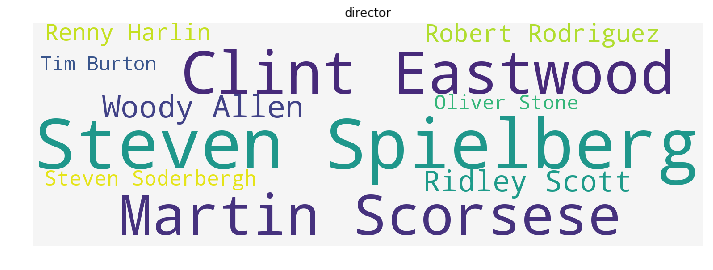

In [178]:
makeCloud(director_list[0:10],"director","whitesmoke")

### Actors

In [179]:
director_dic = to_frequency_table(movies_data['actor_1'])
director_list = list(director_dic.items())
director_list.sort(key=lambda tup: tup[1],reverse=True)

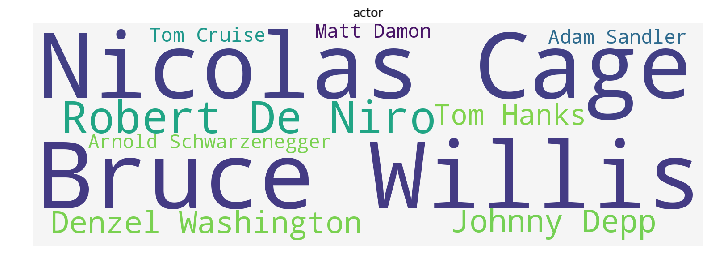

In [180]:
makeCloud(director_list[0:10],"actor","whitesmoke")

# Final check for missing data

In [181]:
test(movies_data)

,Total,Percent
homepage,2239,0.605299
companies_3,1694,0.457962
companies_2,844,0.228170
tagline,374,0.101108
companies_1,74,0.020005
country,31,0.008381
language,15,0.004055
actor_3,14,0.003785
actor_2,10,0.002703
director,8,0.002163


In [182]:
movies_data.columns

Index(['budget', 'title', 'vote_average', 'country', 'language', 'director',
       'actor_1', 'actor_2', 'actor_3', 'companies_1',
       ...
       'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015', 'year_2016', 'duration_1', 'duration_2'],
      dtype='object', length=125)

In [1]:
#movies_data.drop(['budget','title', 'vote_average', 'country', 'language', 'director','actor_1', 'actor_2', 'actor_3', 'companies_1','companies_2','companies_3'],inplace=True,axis=1)

In [187]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3699 entries, 0 to 4798
Columns: 113 entries, Rank to duration_2
dtypes: int64(21), uint8(92)
memory usage: 968.1 KB


In [188]:
movies_data.head()

,Rank,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,Budget_level_1,Budget_level_2,Budget_level_3,year_1925,year_1927,year_1929,year_1930,year_1933,year_1934,year_1935,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1942,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,duration_1,duration_2
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Splitting data into train and test

In [201]:
X=movies_data[[col for col in movies_data.columns.values if col!='Rank']].values
Y=movies_data['Rank'].values
predictors=[col for col in movies_data.columns.values if col!='Rank']

In [202]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=26)

# KNN model

In [205]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_grid={'n_neighbors':[i for i in range(7,20)]}
grid=GridSearchCV(KNeighborsClassifier(), k_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 13 candidates, totalling 39 fits
[CV] n_neighbors=7 ...................................................
[CV] .......... n_neighbors=7, score=0.6662804171494786, total=   0.4s
[CV] n_neighbors=7 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .......... n_neighbors=7, score=0.6674391657010429, total=   0.4s
[CV] n_neighbors=7 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] .......... n_neighbors=7, score=0.6593279258400927, total=   0.3s
[CV] n_neighbors=8 ...................................................
[CV] .......... n_neighbors=8, score=0.6396292004634995, total=   0.3s
[CV] n_neighbors=8 ...................................................
[CV] ........... n_neighbors=8, score=0.657010428736964, total=   0.3s
[CV] n_neighbors=8 ...................................................
[CV] .......... n_neighbors=8, score=0.6512166859791425, total=   0.3s
[CV] n_neighbors=9 ...................................................
[CV] .......... n_neighbors=9, score=0.6674391657010429, total=   0.3s
[CV] n_neighbors=9 ...................................................
[CV] .......... n_neighbors=9, score=0.6685979142526072, total=   0.3s
[CV] n_neighbors=9 ...................................................
[CV] .......... n_neighbors=9, score=0.6778679026651216, total=   0.3s
[CV] n_neighbors=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   37.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [206]:
grid.best_score_, grid.best_params_

(0.6855928930088837, {'n_neighbors': 17})

In [207]:
predictions=grid.predict(X_test)